In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime,timedelta
import warnings
warnings.filterwarnings('ignore')

In [69]:
sales=pd.read_csv('https://raw.githubusercontent.com/shreyajohari2907/Python-Visualization-Case-Study/main/SalesData.csv')

In [9]:
sales.tail()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.0,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.0,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.0,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.0,1.0,0.0,1.31,1.48
3708,47282,Account2750,West,CHARGERS,SAN JOSE,CA,Low,Jun,2858.71,0.0,1.0,0.0,1.33,1.01


# 1. Compare Sales by region for 2016 with 2015 using bar chart

In [20]:
sales_per_region=pd.pivot_table(data=sales,index='Region',values=['Sales2015','Sales2016'],aggfunc='sum')

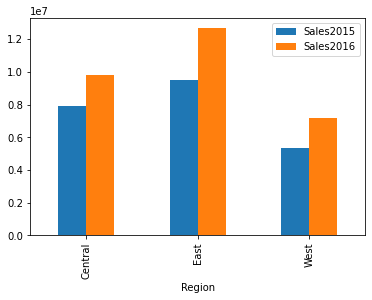

In [24]:
sales_per_region.plot(kind='bar')
plt.show()

# 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [25]:
sales_contibuting=pd.pivot_table(data=sales,index='Region',values='Sales2015',aggfunc='sum')

In [26]:
sales_contibuting

,Sales2015
Region,
Central,7.891729e+06
East,9.512916e+06
West,5.349745e+06


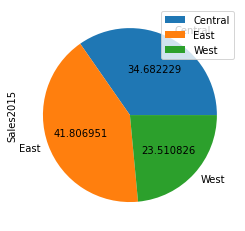

In [33]:
sales_contibuting.plot(kind='pie',labels=['Central','East','West'],subplots=True,autopct='%2f')
plt.show()

# Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [34]:
compare=pd.pivot_table(data=sales,index=['Region','Tier'],values=['Sales2015','Sales2016'],aggfunc=('sum'))

In [35]:
compare

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

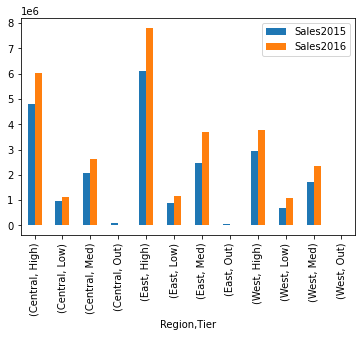

In [37]:
compare.plot(kind='bar')
plt.show()

# 4.In East region, which state registered a decline in 2016 as compared to 2015?

In [39]:
sales.head(1)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.0,13208.52,0.0,4.0,0.7,1.53


In [41]:
east_state=pd.pivot_table(data=sales[sales.Region=='East'],index='State',values=['Sales2015','Sales2016'],aggfunc='sum')

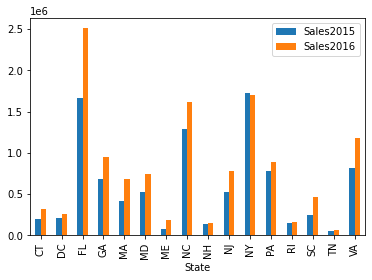

In [43]:
east_state.plot(kind='bar')
plt.show()

# 5.In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [44]:
high_teir=pd.pivot_table(data=sales[sales.Tier=='High'],index=['Division'],values=['Units2015','Units2016'],aggfunc='sum')

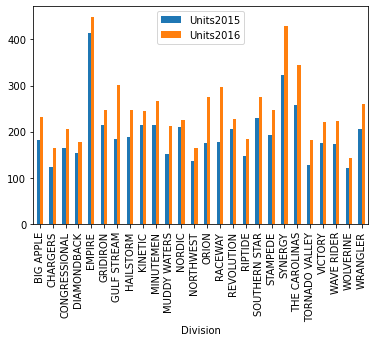

In [46]:
high_teir.plot(kind='bar')
plt.show()

# 6.Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -

In [74]:
sales['Qtr']=np.where((sales.Month=='Jan')|(sales.Month=='Feb')|(sales.Month=='March'),'Q1',
                      np.where((sales.Month=='April')|(sales.Month=='May')|(sales.Month=='june'),"Q2",
                              np.where((sales.Month=='July')|(sales.Month=='Aug')|(sales.Month=='Sep'),'Q3',
                                      'Q4')))


In [75]:
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.0,0.0,3.0,1.15,1.29,Q4
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.0,9.0,6.0,1.33,1.17,Q4
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.0,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.0,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.0,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.0,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.0,1.0,0.0,1.31,1.48,Q1


# 7 Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [52]:
compare_qtr=pd.pivot_table(data=sales,index='Qtr',values=['Sales2015','Sales2016'],aggfunc='sum')

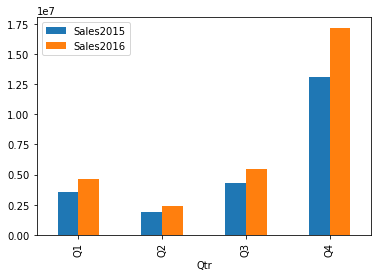

In [55]:
compare_qtr.plot(kind='bar')
plt.show()

# 8 Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.

In [70]:
sales['Sales2016']=np.where(sales.Sales2016<0,sales.Sales2016.mean,
                            sales['Sales2016'])

In [71]:
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.0,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.0,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.0,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.0,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.0,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.0,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.0,1.0,0.0,1.31,1.48


In [79]:
sales_pie_2016=pd.pivot_table(data=sales,index="Tier",columns="Qtr",values="Sales2016",aggfunc='sum')
sales_pie_2016

Qtr
Tier
High
Low
Med
Out


In [80]:
sales_pie_2016.plot(kind="pie",labels=["Q1","Q2","Q3","Q4"])

ValueError: pie requires either y column or 'subplots=True'

In [81]:
#Student of DataScience
#Student of Datatrained-Saurav
#Date-05-08-2022
#Time-11:32